In [30]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\Gurwinder\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Gurwinder\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If y

In [31]:
import tensorflow as tf

In [32]:
word_index = imdb.get_word_index()                                
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])        
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [33]:
import numpy as np
def vectorize_sequence(sequences, dimension=10000):
    results= np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j]=1.
    return results
x_train= vectorize_sequence(train_data)
x_test=vectorize_sequence(test_data)

In [34]:
vec_train_data[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [35]:
y_train= np.asarray(train_labels).astype("float32")
y_test=np.asarray(test_labels).astype("float32")

In [42]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [49]:
from tensorflow import keras
from tensorflow.keras import layers
model =keras.Sequential([layers.Dense(32,activation="tanh"),
                        layers.Dense(16,activation="tanh"),
                        layers.Dense(1,activation="sigmoid")])

In [50]:
model.compile(optimizer="rmsprop",
             loss="mse",
             metrics=["accuracy"])

In [39]:
"""history=model.fit(
                  partial_x_train,
                  partial_y_train,
                  batch_size=512,
                  epochs=20,
                  validation_data=(x_val,y_val))"""

'history=model.fit(\n                  partial_x_train,\n                  partial_y_train,\n                  batch_size=512,\n                  epochs=20,\n                  validation_data=(x_val,y_val))'

In [51]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 1s 15ms/step - loss: 0.1682 - accuracy: 0.7479
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.0661 - accuracy: 0.9165
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.0519 - accuracy: 0.9344
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.0979 - accuracy: 0.8722


[0.09788784384727478, 0.872160017490387]

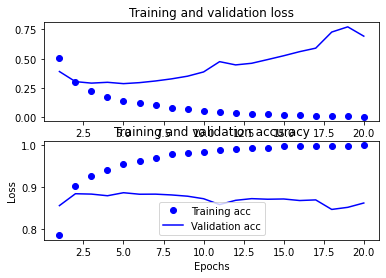

In [24]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
fig,ax= plt.subplots(2)
ax[0].plot(epochs, loss_values, "bo", label="Training loss")        
ax[0].plot(epochs, val_loss_values, "b", label="Validation loss")  
ax[1].plot(epochs, acc, "bo", label="Training acc")
ax[1].plot(epochs, val_acc, "b", label="Validation acc")
ax[0].set_title("Training and validation loss")
ax[1].set_title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

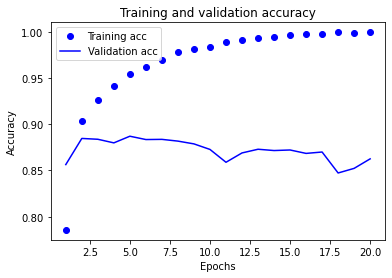

In [26]:
plt.clf()                           
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [41]:
model.predict(x_test)

array([[0.11589703],
       [0.998646  ],
       [0.48916265],
       ...,
       [0.06781951],
       [0.04202107],
       [0.32161713]], dtype=float32)

## Multi Class Classifier

In [52]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


C:\Users\Gurwinder\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Gurwinder\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [53]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in     train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [54]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [57]:
x_train= vectorize_sequence(train_data)
x_test=vectorize_sequence(test_data)

In [86]:
def to_one_hot(labels,dimension=46):
    results= np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i,label]=1.
    return results
y_train=to_one_hot(train_labels)
y_test=to_one_hot(test_labels)

In [87]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [102]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [103]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [109]:
model_1= keras.Sequential([layers.Dense(64, activation="relu"),
                        layers.Dense(64,activation="relu"),
                        layers.Dense(46,activation="softmax")])

In [110]:
model_1.compile(optimizer="rmsprop",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [106]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [113]:
history_1=model_1.fit(partial_x_train,
         partial_y_train,
         epochs=20,
         batch_size=512,
         validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 0s 20ms/step - loss: 0.1123 - accuracy: 0.9562 - val_loss: 1.0907 - val_accuracy: 0.8030
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 0.1088 - accuracy: 0.9582 - val_loss: 1.1443 - val_accuracy: 0.7900
Epoch 3/20
16/16 [==============================] - 0s 20ms/step - loss: 0.1031 - accuracy: 0.9585 - val_loss: 1.1129 - val_accuracy: 0.8020
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.1037 - accuracy: 0.9593 - val_loss: 1.1894 - val_accuracy: 0.7920
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 0.1022 - accuracy: 0.9575 - val_loss: 1.1539 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.1022 - accuracy: 0.9570 - val_loss: 1.2050 - val_accuracy: 0.7940
Epoch 7/20
16/16 [==============================] - 0s 20ms/step - loss: 0.1056 - accuracy: 0.9574 - val_loss: 1.2001 - val_accuracy: 0.7980
Epoch 8/20
16

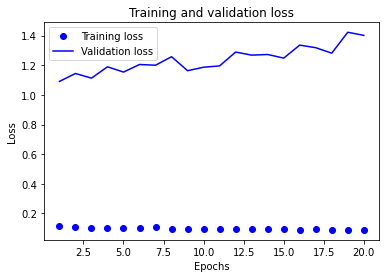

In [115]:
loss = history_1.history["loss"]
val_loss = history_1.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

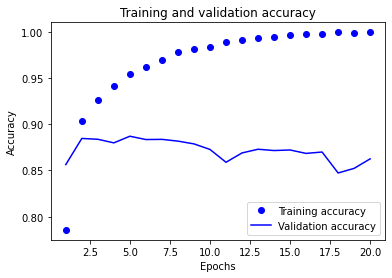

In [116]:
plt.clf()                          
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [117]:
model_1_2 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model_1_2.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model_1_2.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model_1_2.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 16ms/step - loss: 3.1284 - accuracy: 0.4259
Epoch 2/9
18/18 [==============================] - 0s 16ms/step - loss: 1.4895 - accuracy: 0.6933
Epoch 3/9
18/18 [==============================] - 0s 17ms/step - loss: 1.0375 - accuracy: 0.7758
Epoch 4/9
18/18 [==============================] - 0s 15ms/step - loss: 0.8095 - accuracy: 0.8287
Epoch 5/9
18/18 [==============================] - 0s 15ms/step - loss: 0.6440 - accuracy: 0.8652
Epoch 6/9
18/18 [==============================] - 0s 15ms/step - loss: 0.5077 - accuracy: 0.8959
Epoch 7/9
18/18 [==============================] - 0s 15ms/step - loss: 0.3912 - accuracy: 0.9178
Epoch 8/9
18/18 [==============================] - 0s 15ms/step - loss: 0.3112 - accuracy: 0.9342
Epoch 9/9
71/71 [==============================] - 0s 1ms/step - loss: 0.9525 - accuracy: 0.7956


In [122]:
predictions=model_1_2.predict(x_test)
from sklearn.metrics import mean_squared_error
np.argmax(predictions[0])

3

## Regression

In [125]:
from tensorflow.keras.datasets import boston_housing
(train_data,train_targets),(test_data,test_targets)= boston_housing.load_data()

In [126]:
train_data.shape

(404, 13)

In [127]:
mean= train_data.mean(axis=0)
train_data-=mean
std=train_data.std(axis=0)
train_data/= std
test_data-=mean
test_data/=std

In [128]:
def build_model():
    model = keras.Sequential([              
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [129]:
k = 4 
num_val_samples = len(train_data) // k
num_epochs = 100 
all_scores = [] 
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]   
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(                                    
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()                                                   
    model.fit(partial_train_data, partial_train_targets,                    
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)     
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [130]:
all_scores

[1.9500353336334229, 2.320302724838257, 2.5048892498016357, 2.637730598449707]

In [132]:
np.mean(all_scores)

2.3532394766807556

In [136]:
num_epochs = 500 
all_mae_histories = [] 
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]   
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(                                    
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()                                                   
    history = model.fit(partial_train_data, partial_train_targets,          
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [137]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

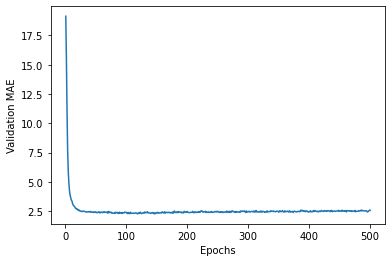

In [138]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()